<marquee scrollamount="20" direction="right"><h1 align="center">WINNING TEAM PREDICTOR</h1></marquee>

<h2 align="center">------------ ORGANIZING DATASET ------------</h2>

### Importing the Libaries

In [1]:
import pandas as pd
import numpy as np
from colorama import Fore
pd.options.mode.chained_assignment = None  # otherwise gives unncessary warning for direct indexing

### Loading dataset into DataFrame

In [2]:
try:
    delivery=pd.read_csv("deliveries.csv")
    matches=pd.read_csv("matches.csv")
except FileNotFoundError:
    print(Fore.RED+"Dataset Not Found!"+Fore.RESET)
else:
    print(Fore.GREEN+"Dataset Loaded Successfully"+Fore.BLACK)

Dataset Loaded Successfully


### Checking the dataset and analyzing 

In [3]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches.shape  # no. of rows and no. of columns

(756, 18)

In [5]:
matches.groupby("Season")["Season"].count() # tells no. of matches played in every season

Season
IPL-2008    58
IPL-2009    57
IPL-2010    60
IPL-2011    73
IPL-2012    74
IPL-2013    76
IPL-2014    60
IPL-2015    59
IPL-2016    60
IPL-2017    59
IPL-2018    60
IPL-2019    60
Name: Season, dtype: int64

In [6]:
matches.groupby("Season")["Season"].count().cumsum()  # cumulative sum 

Season
IPL-2008     58
IPL-2009    115
IPL-2010    175
IPL-2011    248
IPL-2012    322
IPL-2013    398
IPL-2014    458
IPL-2015    517
IPL-2016    577
IPL-2017    636
IPL-2018    696
IPL-2019    756
Name: Season, dtype: int64

In [7]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
delivery.shape

(179078, 21)

### deciding which columns to consider for final dataframe

In [9]:
matches.columns  # tells columns field --> we need to reduce it to make efficient in data analysis

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [10]:
delivery.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [11]:
# important paramter for data analysis -->  batting team --> A , bowling team --> B , runs left B , balls left B , wickets left B , total runs scored by A , current run rate B , required run rate B , city , match result A or B 

### DATA CLEANING

In [12]:
delivery.index

RangeIndex(start=0, stop=179078, step=1)

In [13]:
matches.index

RangeIndex(start=0, stop=756, step=1)

In [14]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [15]:
# get total runs for each match in each inning
total_runs_df=delivery.groupby(["match_id","inning"])["total_runs"].sum()
total_runs_df=total_runs_df.reset_index()
total_runs_df.head(6)

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
5,3,2,184


In [16]:
total_runs_df.shape

(1528, 3)

In [17]:
# we require total runs of first team only
total_runs_df = total_runs_df.query("inning==1")
# total_runs_df.shape  # --> same rows count as matches , hence merge possible
total_runs_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [18]:
# merging the total_runs scored by team1 with matches dataframe
match_df = pd.merge(matches,total_runs_df[["match_id","total_runs"]],left_on='id',right_on='match_id')

In [19]:
# now this dataframe contains id two time therefor removing match_id
if("match_id" in match_df.columns):
    match_df = match_df.drop(columns="match_id")
    print("Dropped Successfully!")
match_df

Dropped Successfully!


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,155


In [20]:
# now need to drop those teams who is not playing ipl currently
# all teams 
# match_df.groupby("team1")["team1"].count()
match_df["team1"].unique()   # Gujarat Lions ,Rising Pune Supergiants ,Kochi Tuskers Kerala ,Pune Warriors --> no longer playing
# Delhi Daredevils == Delhi Capitals
# Deccan Chargers == Sunrisers Hyderabad --> we will change the name

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

#### Modifying team name

In [21]:
# modifing team name
match_df["team1"]=match_df["team1"].str.replace("Delhi Daredevils","Delhi Capitals")
match_df["team1"]=match_df["team1"].str.replace("Deccan Chargers","Sunrisers Hyderabad")

In [22]:
# in team2
match_df["team2"]=match_df["team2"].str.replace("Delhi Daredevils","Delhi Capitals")
match_df["team2"]=match_df["team2"].str.replace("Deccan Chargers","Sunrisers Hyderabad") 

In [23]:
# in toss winner
match_df["toss_winner"]=match_df["toss_winner"].str.replace("Delhi Daredevils","Delhi Capitals")
match_df["toss_winner"]=match_df["toss_winner"].str.replace("Deccan Chargers","Sunrisers Hyderabad")

In [24]:
# in winner
match_df["winner"]=match_df["winner"].str.replace("Delhi Daredevils","Delhi Capitals")
match_df["winner"]=match_df["winner"].str.replace("Deccan Chargers","Sunrisers Hyderabad")

In [25]:
# for delivery
delivery["batting_team"]=delivery["batting_team"].str.replace("Delhi Daredevils","Delhi Capitals")
delivery["batting_team"]=delivery["batting_team"].str.replace("Deccan Chargers","Sunrisers Hyderabad")

In [26]:
delivery["bowling_team"]=delivery["bowling_team"].str.replace("Delhi Daredevils","Delhi Capitals")
delivery["bowling_team"]=delivery["bowling_team"].str.replace("Deccan Chargers","Sunrisers Hyderabad")

In [27]:
match_df["team1"].value_counts()

Sunrisers Hyderabad            106
Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Capitals                  78
Rajasthan Royals                67
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Name: team1, dtype: int64

#### Selecting Only those teams which consistently playing

In [28]:
consistent_teams=["Royal Challengers Bangalore","Kolkata Knight Riders","Kings XI Punjab","Sunrisers Hyderabad"
                   ,"Mumbai Indians","Delhi Capitals","Chennai Super Kings","Rajasthan Royals"]

In [29]:
match_df = match_df[(match_df["team1"].isin(consistent_teams)) & (match_df["team2"].isin(consistent_teams))]

In [30]:
# match_df
match_df.shape  # no. of matches reduced from 756 to 641

(641, 19)

#### removing those matches where match remain suspended due to rain and duckworth-lewis applied

In [31]:
match_df["dl_applied"].value_counts()  # 15 matches were affected by rain --> hence removing it

0    626
1     15
Name: dl_applied, dtype: int64

In [32]:
match_df = match_df[match_df["dl_applied"]==0]  # removed 15 matches
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,207
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,157
6,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,178
7,8,IPL-2017,Indore,10-04-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,148
9,10,IPL-2017,Mumbai,12-04-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,155


#### Retrieving Those Columns which are required from match_df DataFrame

In [33]:
match_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3', 'total_runs'],
      dtype='object')

In [34]:
# id --> to join with delivery dataframe , city , winner , total_runs
match_df = match_df[["id","city","winner","total_runs"]]
match_df

,id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
4,5,Bangalore,Royal Challengers Bangalore,157
6,7,Mumbai,Mumbai Indians,178
7,8,Indore,Kings XI Punjab,148
9,10,Mumbai,Mumbai Indians,158
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,143
752,11412,Chennai,Mumbai Indians,136
753,11413,Visakhapatnam,Delhi Capitals,171
754,11414,Visakhapatnam,Chennai Super Kings,155


In [35]:
delivery.shape

(179078, 21)

In [36]:
delivery

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [37]:
# now merging match_df with delivery --> where id is same --> each match has unique id
merge_df = pd.merge(delivery,match_df,left_on="match_id",right_on="id")
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,batsman_runs,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,id,city,winner,total_runs_y
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,NaN,NaN,NaN,1,Hyderabad,Sunrisers Hyderabad,207
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,NaN,NaN,NaN,1,Hyderabad,Sunrisers Hyderabad,207
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,4,0,4,NaN,NaN,NaN,1,Hyderabad,Sunrisers Hyderabad,207
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,NaN,NaN,NaN,1,Hyderabad,Sunrisers Hyderabad,207
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,2,2,NaN,NaN,NaN,1,Hyderabad,Sunrisers Hyderabad,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,1,0,1,NaN,NaN,NaN,11415,Hyderabad,Mumbai Indians,152
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,2,0,2,NaN,NaN,NaN,11415,Hyderabad,Mumbai Indians,152
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,1,0,1,SR Watson,run out,KH Pandya,11415,Hyderabad,Mumbai Indians,152
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,2,0,2,NaN,NaN,NaN,11415,Hyderabad,Mumbai Indians,152


In [38]:
# now removing id as it contains 2 times
if("id" in merge_df.columns):
    merge_df.drop(columns="id",inplace=True)
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,total_runs_y
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,207
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,207
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,207
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,207
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,1,0,1,NaN,NaN,NaN,Hyderabad,Mumbai Indians,152
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,152
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,1,0,1,SR Watson,run out,KH Pandya,Hyderabad,Mumbai Indians,152
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,152


In [39]:
# here total_runs_y means target for 2nd team_x
merge_df.rename(columns={"total_runs_y":"target"},inplace=True)
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,target
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,207
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,207
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,207
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,207
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,1,0,1,NaN,NaN,NaN,Hyderabad,Mumbai Indians,152
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,152
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,1,0,1,SR Watson,run out,KH Pandya,Hyderabad,Mumbai Indians,152
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,152


In [40]:
# now incrementing target field by 1 as target is always +1 to runs scored by 1st team
merge_df["target"] = merge_df["target"].apply(lambda x:x+1)

In [41]:
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,target
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,4,0,4,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,2,2,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,1,0,1,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,1,0,1,SR Watson,run out,KH Pandya,Hyderabad,Mumbai Indians,153
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153


In [42]:
# now we need to predict on basis of target by 1st team --> hence removing innnings = 1  (since we already obtained the target) and ball to ball delivery is not required
merge_df = merge_df[merge_df["inning"]==2]
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,penalty_runs,batsman_runs,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,target
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,1,0,1,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,2,0,2,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,4,0,4,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,1,0,1,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,1,0,1,SR Watson,run out,KH Pandya,Hyderabad,Mumbai Indians,153
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,2,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153


#### now calculating balls left , runs left and wickets left after each ball

#### <u>for balls left</u> --> 120 - ((over-1)*6 + ball)

In [43]:
# adding new column --> balls faced
merge_df["balls_faced"] = (merge_df["over"]-1)*6 +(merge_df["ball"])
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,batsman_runs,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,target,balls_faced
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,1,0,1,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,1
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,2
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,3
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,2,0,2,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,4,0,4,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,1,0,1,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,116
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,2,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,117
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,1,0,1,SR Watson,run out,KH Pandya,Hyderabad,Mumbai Indians,153,118
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,2,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,119


In [44]:
# adding new column --> balls_left
merge_df["balls_left"] = 120 - merge_df["balls_faced"]
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,extra_runs,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,target,balls_faced,balls_left
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,1,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,1,119
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,2,118
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,3,117
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,0,2,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,116
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,0,4,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,5,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,0,1,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,116,4
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,117,3
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,0,1,SR Watson,run out,KH Pandya,Hyderabad,Mumbai Indians,153,118,2
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,0,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,119,1


#### <u>for runs left</u> for each match --> first groupby by match_id and then find cumulative sum , then minus from target 

In [45]:
# adding new column --> score
merge_df["current_score"] = merge_df.groupby("match_id")["total_runs_x"].cumsum()
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,total_runs_x,player_dismissed,dismissal_kind,fielder,city,winner,target,balls_faced,balls_left,current_score
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,1,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,1,119,1
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,2,118,1
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,3,117,1
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,2,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,116,3
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,4,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,5,115,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,1,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,116,4,152
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,117,3,154
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,1,SR Watson,run out,KH Pandya,Hyderabad,Mumbai Indians,153,118,2,155
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,2,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,119,1,157


In [46]:
# adding new column --> runs_left
merge_df["runs_left"] = merge_df["target"] - merge_df["current_score"]
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,player_dismissed,dismissal_kind,fielder,city,winner,target,balls_faced,balls_left,current_score,runs_left
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,1,119,1,207
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,2,118,1,207
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,3,117,1,207
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,116,3,205
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,5,115,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,116,4,152,1
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,117,3,154,-1
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,SR Watson,run out,KH Pandya,Hyderabad,Mumbai Indians,153,118,2,155,-2
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,119,1,157,-4


In [47]:
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,player_dismissed,dismissal_kind,fielder,city,winner,target,balls_faced,balls_left,current_score,runs_left
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,1,119,1,207
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,2,118,1,207
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,3,117,1,207
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,116,3,205
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,5,115,7,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,116,4,152,1
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,117,3,154,-1
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,SR Watson,run out,KH Pandya,Hyderabad,Mumbai Indians,153,118,2,155,-2
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,NaN,NaN,NaN,Hyderabad,Mumbai Indians,153,119,1,157,-4


#### <u>for wickets left</u> --> add 1 when player_dismissed == 1 and (10 - answer)

In [48]:
merge_df["player_dismissed"].fillna(0,inplace=True)
merge_df["player_dismissed"] = merge_df["player_dismissed"].apply(lambda x:x if x==0 else 1)  # if not 0 then replace by 1 and 1 means wicket fall

In [49]:
# adding new column --> wickets_fallen
merge_df["wickets_fallen"] = merge_df.groupby("match_id")["player_dismissed"].cumsum()
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,dismissal_kind,fielder,city,winner,target,balls_faced,balls_left,current_score,runs_left,wickets_fallen
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,1,119,1,207,0
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,2,118,1,207,0
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,3,117,1,207,0
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,4,116,3,205,0
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,NaN,Hyderabad,Sunrisers Hyderabad,208,5,115,7,201,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,NaN,NaN,Hyderabad,Mumbai Indians,153,116,4,152,1,5
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,NaN,NaN,Hyderabad,Mumbai Indians,153,117,3,154,-1,5
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,run out,KH Pandya,Hyderabad,Mumbai Indians,153,118,2,155,-2,6
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,NaN,NaN,Hyderabad,Mumbai Indians,153,119,1,157,-4,6


In [50]:
# adding new column --> wickets_left
merge_df["wickets_left"] = 10 - merge_df["wickets_fallen"]
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,fielder,city,winner,target,balls_faced,balls_left,current_score,runs_left,wickets_fallen,wickets_left
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,NaN,Hyderabad,Sunrisers Hyderabad,208,1,119,1,207,0,10
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,Hyderabad,Sunrisers Hyderabad,208,2,118,1,207,0,10
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,Hyderabad,Sunrisers Hyderabad,208,3,117,1,207,0,10
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,Hyderabad,Sunrisers Hyderabad,208,4,116,3,205,0,10
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,NaN,Hyderabad,Sunrisers Hyderabad,208,5,115,7,201,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,NaN,Hyderabad,Mumbai Indians,153,116,4,152,1,5,5
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,NaN,Hyderabad,Mumbai Indians,153,117,3,154,-1,5,5
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,KH Pandya,Hyderabad,Mumbai Indians,153,118,2,155,-2,6,4
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,NaN,Hyderabad,Mumbai Indians,153,119,1,157,-4,6,4


In [51]:
# merge_df.query("match_id==1") --> to check

#### calculating current run rate and required run rate

#### CRR --> (current_score) * 6 / (balls_faced)

In [52]:
# adding new column --> CRR
merge_df["CRR"] = merge_df["current_score"] * 6 / (merge_df["balls_faced"])
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,city,winner,target,balls_faced,balls_left,current_score,runs_left,wickets_fallen,wickets_left,CRR
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,Hyderabad,Sunrisers Hyderabad,208,1,119,1,207,0,10,6.000000
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,Hyderabad,Sunrisers Hyderabad,208,2,118,1,207,0,10,3.000000
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,Hyderabad,Sunrisers Hyderabad,208,3,117,1,207,0,10,2.000000
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,Hyderabad,Sunrisers Hyderabad,208,4,116,3,205,0,10,4.500000
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,Hyderabad,Sunrisers Hyderabad,208,5,115,7,201,0,10,8.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,Hyderabad,Mumbai Indians,153,116,4,152,1,5,5,7.862069
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,Hyderabad,Mumbai Indians,153,117,3,154,-1,5,5,7.897436
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,Hyderabad,Mumbai Indians,153,118,2,155,-2,6,4,7.881356
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,Hyderabad,Mumbai Indians,153,119,1,157,-4,6,4,7.915966


#### RRR -->  (runs_left * 6) / (balls_left)

In [53]:
# adding new column --> RRR
merge_df["RRR"] = merge_df["runs_left"] * 6 / (merge_df["balls_left"])
merge_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,winner,target,balls_faced,balls_left,current_score,runs_left,wickets_fallen,wickets_left,CRR,RRR
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,Sunrisers Hyderabad,208,1,119,1,207,0,10,6.000000,10.436975
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,Sunrisers Hyderabad,208,2,118,1,207,0,10,3.000000,10.525424
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,Sunrisers Hyderabad,208,3,117,1,207,0,10,2.000000,10.615385
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,...,Sunrisers Hyderabad,208,4,116,3,205,0,10,4.500000,10.603448
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,...,Sunrisers Hyderabad,208,5,115,7,201,0,10,8.400000,10.486957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,...,Mumbai Indians,153,116,4,152,1,5,5,7.862069,1.500000
149574,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,...,Mumbai Indians,153,117,3,154,-1,5,5,7.897436,-2.000000
149575,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,...,Mumbai Indians,153,118,2,155,-2,6,4,7.881356,-6.000000
149576,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,...,Mumbai Indians,153,119,1,157,-4,6,4,7.915966,-24.000000


#### getting result in terms of 0 and 1  --->  0 means team1 (first batting) won and 1 means team2 (chasing team) won , result will be compare on basis of chasing team 

In [54]:
# merge_df["batting_team"].apply(lambda x:x if x=="Royal Challengers Bangalore" else 1) --> lambda takes 1D value . hence cannot use , instead use function
def final_result(match):
    if(match["batting_team"]==match["winner"]):
        return 1
    else:
        return 0
merge_df["result"] = merge_df.apply(final_result,axis=1) 

In [55]:
merge_df["batting_team"].value_counts()

Delhi Capitals                 10199
Royal Challengers Bangalore     9684
Kolkata Knight Riders           9658
Mumbai Indians                  9063
Kings XI Punjab                 8701
Rajasthan Royals                8543
Chennai Super Kings             8487
Sunrisers Hyderabad             8078
Name: batting_team, dtype: int64

### NOW ALL THE INFORMATION IS COMPUTED AND ANALYZED , NOW RETRIEVING THOSE FIELDS ONLY WHICH ARE REQUIRED FOR CREATING PREDICTION MODEL 

batting team --> A , bowling team --> B , runs left B , balls left B , wickets left B , total runs scored by A , current run rate B , required run rate B , city , match result A or B 

In [56]:
final_data = merge_df[["match_id","city","batting_team","bowling_team",
        "target","current_score","runs_left",
        "balls_faced","balls_left",
        "wickets_fallen","wickets_left",
        "CRR","RRR","result"]]

In [57]:
print(final_data.shape)
final_data  # here result gives answer about whether the chasing team won or not

(72413, 14)


,match_id,city,batting_team,bowling_team,target,current_score,runs_left,balls_faced,balls_left,wickets_fallen,wickets_left,CRR,RRR,result
125,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,208,1,207,1,119,0,10,6.000000,10.436975,0
126,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,208,1,207,2,118,0,10,3.000000,10.525424,0
127,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,208,1,207,3,117,0,10,2.000000,10.615385,0
128,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,208,3,205,4,116,0,10,4.500000,10.603448,0
129,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,208,7,201,5,115,0,10,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,153,152,1,116,4,5,5,7.862069,1.500000,0
149574,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,153,154,-1,117,3,5,5,7.897436,-2.000000,0
149575,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,153,155,-2,118,2,6,4,7.881356,-6.000000,0
149576,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,153,157,-4,119,1,6,4,7.915966,-24.000000,0


In [58]:
# checking whether sum cells are empty
final_data.isnull().sum()  # city contains null values --> removing them

match_id            0
city              832
batting_team        0
bowling_team        0
target              0
current_score       0
runs_left           0
balls_faced         0
balls_left          0
wickets_fallen      0
wickets_left        0
CRR                 0
RRR                 5
result              0
dtype: int64

In [59]:
final_data = final_data.dropna()
print(final_data.shape)
final_data

(71576, 14)


,match_id,city,batting_team,bowling_team,target,current_score,runs_left,balls_faced,balls_left,wickets_fallen,wickets_left,CRR,RRR,result
125,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,208,1,207,1,119,0,10,6.000000,10.436975,0
126,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,208,1,207,2,118,0,10,3.000000,10.525424,0
127,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,208,1,207,3,117,0,10,2.000000,10.615385,0
128,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,208,3,205,4,116,0,10,4.500000,10.603448,0
129,1,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,208,7,201,5,115,0,10,8.400000,10.486957,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,153,152,1,116,4,5,5,7.862069,1.500000,0
149574,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,153,154,-1,117,3,5,5,7.897436,-2.000000,0
149575,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,153,155,-2,118,2,6,4,7.881356,-6.000000,0
149576,11415,Hyderabad,Chennai Super Kings,Mumbai Indians,153,157,-4,119,1,6,4,7.915966,-24.000000,0


In [60]:
# since rrr was becoming -inf or inf when balls_left becomes 0 , hence removing last ball --> it doesn't affects much on model
final_data = final_data[final_data["balls_left"] != 0]   

In [61]:
final_data.shape

(71342, 14)

In [62]:
final_data = final_data.reset_index()  #--> reseted the index 
final_data.drop(columns=["index"],axis=1,inplace=True)

In [63]:
final_data = final_data.sample(frac=1)    # shuffling the dataframe so, the ml model can divide and result doesn't look baised

In [64]:
final_data.sample()

,match_id,city,batting_team,bowling_team,target,current_score,runs_left,balls_faced,balls_left,wickets_fallen,wickets_left,CRR,RRR,result
65658,11147,Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,234,68,166,72,48,6,4,5.666667,20.75,0


### Saving the dataFrame

In [65]:
final_data.to_csv("final_data.csv",index=False)

### NOW BUILDING MODEL USING SKLEARN ( SCIKIT LEARN - MACHINE LEARNING LIBRARY)

In [66]:
# on the basis of runs, balls, wicket, city, battingteam , bowling team and target we are going to predict the winning ratio of both teams (result in percentage) --> result is dependent variable (response variable) and all other paramters are independent variables (predictor variable) 

In [67]:
final_data

,match_id,city,batting_team,bowling_team,target,current_score,runs_left,balls_faced,balls_left,wickets_fallen,wickets_left,CRR,RRR,result
31403,346,Mumbai,Mumbai Indians,Sunrisers Hyderabad,101,1,100,5,115,1,9,1.200000,5.217391,1
32875,363,Kolkata,Kolkata Knight Riders,Mumbai Indians,183,66,117,65,55,3,7,6.092308,12.763636,0
5176,76,Delhi,Royal Challengers Bangalore,Delhi Capitals,192,108,84,73,47,3,7,8.876712,10.723404,0
3758,64,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,111,6,105,8,112,1,9,4.500000,5.625000,1
3058,53,Kolkata,Kolkata Knight Riders,Mumbai Indians,174,128,46,84,36,5,5,9.142857,7.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15249,168,Durban,Kolkata Knight Riders,Rajasthan Royals,102,91,11,109,11,6,4,5.009174,6.000000,1
6321,86,Mumbai,Mumbai Indians,Rajasthan Royals,104,72,32,67,53,2,8,6.447761,3.622642,1
19635,206,Chennai,Rajasthan Royals,Chennai Super Kings,247,68,179,42,78,0,10,9.714286,13.769231,0
41339,454,Delhi,Mumbai Indians,Chennai Super Kings,193,130,63,98,22,6,4,7.959184,17.181818,0


##### Train Test Split : https://www.youtube.com/watch?v=fwY9Qv96DJY

<img src="maxresdefault.jpg" alt="traintestsplit" width="700px">

In [68]:
from sklearn.model_selection import train_test_split 
# split the dataframe into training and testing phase
# to train the model using training sample (80% mostly)  --> selects random sample
# test the model using test sample

# firstly dividing the independent and dependent variable in X and y on which testing and training required
 
# X  --> independent varaiable
X = final_data.iloc[:,1:-1]   # all atributes except last column
X

,city,batting_team,bowling_team,target,current_score,runs_left,balls_faced,balls_left,wickets_fallen,wickets_left,CRR,RRR
31403,Mumbai,Mumbai Indians,Sunrisers Hyderabad,101,1,100,5,115,1,9,1.200000,5.217391
32875,Kolkata,Kolkata Knight Riders,Mumbai Indians,183,66,117,65,55,3,7,6.092308,12.763636
5176,Delhi,Royal Challengers Bangalore,Delhi Capitals,192,108,84,73,47,3,7,8.876712,10.723404
3758,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,111,6,105,8,112,1,9,4.500000,5.625000
3058,Kolkata,Kolkata Knight Riders,Mumbai Indians,174,128,46,84,36,5,5,9.142857,7.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
15249,Durban,Kolkata Knight Riders,Rajasthan Royals,102,91,11,109,11,6,4,5.009174,6.000000
6321,Mumbai,Mumbai Indians,Rajasthan Royals,104,72,32,67,53,2,8,6.447761,3.622642
19635,Chennai,Rajasthan Royals,Chennai Super Kings,247,68,179,42,78,0,10,9.714286,13.769231
41339,Delhi,Mumbai Indians,Chennai Super Kings,193,130,63,98,22,6,4,7.959184,17.181818


In [69]:
# Y --> dependent variable
y = final_data.iloc[:,-1]  # only last column (result)
y

31403    1
32875    0
5176     0
3758     1
3058     0
        ..
15249    1
6321     1
19635    0
41339    0
6577     1
Name: result, Length: 71342, dtype: int64

In [70]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2 , random_state=1)  # test size -> 20% and train size --> 80%

In [71]:
X_train    # here city , batting team and bowling team is in string hence need to use one hot encoding otherwise gives problem since ml models are good in managing numerical data

,city,batting_team,bowling_team,target,current_score,runs_left,balls_faced,balls_left,wickets_fallen,wickets_left,CRR,RRR
55308,Hyderabad,Sunrisers Hyderabad,Kings XI Punjab,144,139,5,102,18,3,7,8.176471,1.666667
32250,Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,182,28,154,26,94,0,10,6.461538,9.829787
15684,Centurion,Sunrisers Hyderabad,Delhi Capitals,154,114,40,65,55,3,7,10.523077,4.363636
7330,Kolkata,Delhi Capitals,Kolkata Knight Riders,134,93,41,86,34,6,4,6.488372,7.235294
31021,Delhi,Mumbai Indians,Delhi Capitals,208,160,48,109,11,7,3,8.807339,26.181818
...,...,...,...,...,...,...,...,...,...,...,...,...
45138,Bangalore,Delhi Capitals,Royal Challengers Bangalore,187,73,114,53,67,2,8,8.264151,10.208955
43575,Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,156,45,111,49,71,3,7,5.510204,9.380282
22127,Dharamsala,Chennai Super Kings,Kings XI Punjab,193,0,193,1,119,0,10,0.000000,9.731092
23568,Bangalore,Mumbai Indians,Royal Challengers Bangalore,141,62,79,49,71,1,9,7.591837,6.676056


##### Column Transformer : https://www.youtube.com/watch?v=5TVj6iEBR4I
##### One Hot Encoding : https://www.youtube.com/watch?v=9yl6-HEY7_s

<img src="onehotencoding.png" alt="ohe" width=700>

In [72]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# differnet encoders --> SimpleImputer --> replaces null/NaN with mean values  , OneHotDecoder , OridinalEncoder
# since here categorical data is in 3 columns so, need to use column transformer

ohe = ColumnTransformer(transformers=[("trf",OneHotEncoder(sparse=False,drop="first"),["city","batting_team","bowling_team"])],remainder="passthrough")  # remainder --> drop or remain as it is (passthrough) the other columns 


In [73]:
# pipelining and logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [74]:
pipe = Pipeline(
    steps=[("step1",ohe),("step2",LogisticRegression(solver="liblinear"))]
)

##### fit , transform , fit_transform , predict : https://www.youtube.com/watch?v=BotYLBQfd5M 

fit --> it gives the required paramters for example in SimpleImputer --> Mean <br>
transform --> it transforms the data based on fit value ,sets null/NaN value to mean in SimpleImputer<br>
fit_transform --> combination of above 2 --> same as fit().transform()<br>
**fit and transform for train data**<br>
**transform for test data**<br>

in model only 2 process  --> fit and predict <br>
**fit for training data and predict for test data** <br>

In [75]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['city', 'batting_team',
                                                   'bowling_team'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [76]:
predict_y = pipe.predict(X_test)   # preedicts based on trained values
predict_y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

##### We calculate accuracy by dividing the number of correct predictions (the corresponding diagonal in the matrix) by the total number of samples. 

In [77]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(predict_y,y_test)
print("Accuracy : {:.3f} %".format(acc*100))  # can use other models too , but high accuracy doesn't mean it is suitable for our problem  --> since it doesn't give more flexibity

Accuracy : 80.097 %


In [78]:
# predict probability
pipe.predict_proba(X_test)

array([[0.18477519, 0.81522481],
       [0.22047382, 0.77952618],
       [0.03211137, 0.96788863],
       ...,
       [0.31555534, 0.68444466],
       [0.01778341, 0.98221659],
       [0.49641307, 0.50358693]])

In [79]:
import random
rand = list(final_data["match_id"])
match_id = random.choice(rand)

In [80]:
final_data

,match_id,city,batting_team,bowling_team,target,current_score,runs_left,balls_faced,balls_left,wickets_fallen,wickets_left,CRR,RRR,result
31403,346,Mumbai,Mumbai Indians,Sunrisers Hyderabad,101,1,100,5,115,1,9,1.200000,5.217391,1
32875,363,Kolkata,Kolkata Knight Riders,Mumbai Indians,183,66,117,65,55,3,7,6.092308,12.763636,0
5176,76,Delhi,Royal Challengers Bangalore,Delhi Capitals,192,108,84,73,47,3,7,8.876712,10.723404,0
3758,64,Kolkata,Kolkata Knight Riders,Sunrisers Hyderabad,111,6,105,8,112,1,9,4.500000,5.625000,1
3058,53,Kolkata,Kolkata Knight Riders,Mumbai Indians,174,128,46,84,36,5,5,9.142857,7.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15249,168,Durban,Kolkata Knight Riders,Rajasthan Royals,102,91,11,109,11,6,4,5.009174,6.000000,1
6321,86,Mumbai,Mumbai Indians,Rajasthan Royals,104,72,32,67,53,2,8,6.447761,3.622642,1
19635,206,Chennai,Rajasthan Royals,Chennai Super Kings,247,68,179,42,78,0,10,9.714286,13.769231,0
41339,454,Delhi,Mumbai Indians,Chennai Super Kings,193,130,63,98,22,6,4,7.959184,17.181818,0


In [81]:
import pickle
with open("final_df.pkl","wb") as f:
    pickle.dump(final_data,f)

In [82]:
# calculating the probability after each over in particular match
def match_prob(id,pipe):
    data = final_data[final_data["match_id"]==id]
    xyz = final_data.query(f"((balls_faced>=114 and balls_faced<=119) or balls_faced%6 ==0 ) and match_id == {id}")
    xyz.sort_values("balls_faced",inplace=True)
    wxy = xyz[xyz["balls_faced"]%6==0]
    wxy = wxy.append(xyz.iloc[-1])
    data = wxy.iloc[:,1:-1]
    result = pipe.predict_proba(data)
    data["lose_prob"] = np.round(result.T[0]*100,1)
    data["win_prob"] = np.round(result.T[1]*100,1)
    target = data["target"].values[0]
    print("Target-",target)
    new = data[["current_score","balls_faced","wickets_fallen","lose_prob","win_prob"]]
    new['end_of_over'] = range(1,new.shape[0]+1)
    new["runs_in_over"] = new["current_score"].diff()
    over1 = new["current_score"].values[0]
    wicket1 = new["wickets_fallen"].values[0]
    new["runs_in_over"] = new["runs_in_over"].fillna(over1) 
    new["runs_in_over"] = new["runs_in_over"].astype(int)
    new["wicket_in_over"] = new["wickets_fallen"].diff()
    new["wicket_in_over"] = new["wicket_in_over"].fillna(wicket1)
    new["wicket_in_over"] = new["wicket_in_over"].astype(int)
    return new,target

In [83]:
X_train

,city,batting_team,bowling_team,target,current_score,runs_left,balls_faced,balls_left,wickets_fallen,wickets_left,CRR,RRR
55308,Hyderabad,Sunrisers Hyderabad,Kings XI Punjab,144,139,5,102,18,3,7,8.176471,1.666667
32250,Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,182,28,154,26,94,0,10,6.461538,9.829787
15684,Centurion,Sunrisers Hyderabad,Delhi Capitals,154,114,40,65,55,3,7,10.523077,4.363636
7330,Kolkata,Delhi Capitals,Kolkata Knight Riders,134,93,41,86,34,6,4,6.488372,7.235294
31021,Delhi,Mumbai Indians,Delhi Capitals,208,160,48,109,11,7,3,8.807339,26.181818
...,...,...,...,...,...,...,...,...,...,...,...,...
45138,Bangalore,Delhi Capitals,Royal Challengers Bangalore,187,73,114,53,67,2,8,8.264151,10.208955
43575,Bangalore,Royal Challengers Bangalore,Sunrisers Hyderabad,156,45,111,49,71,3,7,5.510204,9.380282
22127,Dharamsala,Chennai Super Kings,Kings XI Punjab,193,0,193,1,119,0,10,0.000000,9.731092
23568,Bangalore,Mumbai Indians,Royal Challengers Bangalore,141,62,79,49,71,1,9,7.591837,6.676056


In [84]:
a , b = match_prob(69,pipe)
a

Target- 183


,current_score,balls_faced,wickets_fallen,lose_prob,win_prob,end_of_over,runs_in_over,wicket_in_over
4329,2,6,0,70.2,29.8,1,2,0
4335,14,12,0,58.8,41.2,2,12,0
4342,18,18,2,84.5,15.5,3,4,2
4348,21,24,2,86.3,13.7,4,3,0
4355,34,30,2,79.2,20.8,5,13,0
4361,39,36,2,79.4,20.6,6,5,0
4367,45,42,2,78.6,21.4,7,6,0
4374,60,48,2,66.4,33.6,8,15,0
4381,65,54,3,79.1,20.9,9,5,1
4387,67,60,4,89.8,10.2,10,2,1


##### testing

In [85]:
new_df,target = match_prob(1,pipe)
new_df.reset_index(inplace=True)
new_df.drop(columns=["index"],axis=1)

Target- 208


,current_score,balls_faced,wickets_fallen,lose_prob,win_prob,end_of_over,runs_in_over,wicket_in_over
0,11,6,0,85.3,14.7,1,11,0
1,12,12,0,89.0,11.0,2,1,0
2,28,18,0,79.9,20.1,3,16,0
3,39,24,0,73.5,26.5,4,11,0
4,44,30,0,74.0,26.0,5,5,0
5,54,36,1,79.9,20.1,6,10,1
6,61,42,2,87.0,13.0,7,7,1
7,74,48,2,80.5,19.5,8,13,0
8,84,54,2,75.5,24.5,9,10,0
9,94,60,2,69.8,30.2,10,10,0


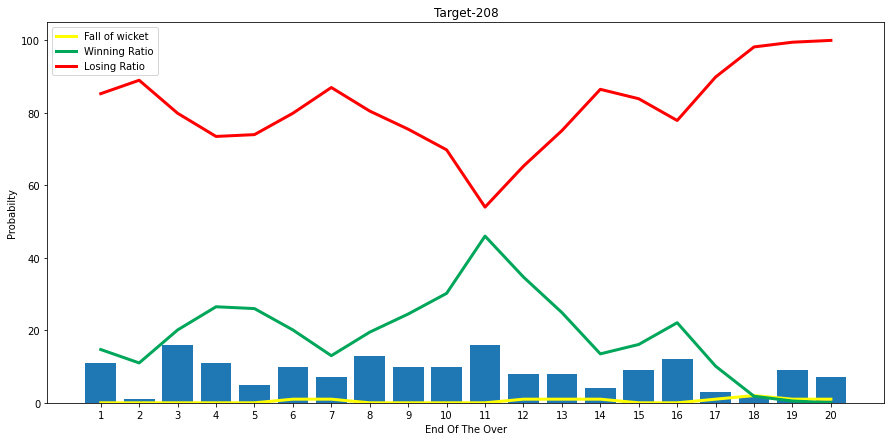

In [86]:
# visualiation 
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15,7))
x_value = new_df['end_of_over']
plt.plot(x_value,new_df['wicket_in_over'],color='yellow',lw=3,label="Fall of wicket")
plt.plot(x_value,new_df['win_prob'],color='#00a65a',lw=3,label="Winning Ratio")
plt.plot(x_value,new_df['lose_prob'],color='red',lw=3,label="Losing Ratio")
plt.bar(x_value,new_df['runs_in_over'])
plt.xticks(np.arange(1,21))
plt.yticks(np.arange(0,101,20))
plt.title('Target-' + str(target))
plt.xlabel("End Of The Over")
plt.ylabel("Probabilty")
plt.legend()
plt.show()

In [87]:
consistent_teams.sort()
consistent_teams

['Chennai Super Kings',
 'Delhi Capitals',
 'Kings XI Punjab',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Rajasthan Royals',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [88]:
city = list(final_data["city"].unique())
city.sort()
city

['Abu Dhabi',
 'Ahmedabad',
 'Bangalore',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kimberley',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam']

In [89]:
import pickle
with open("Teams.pkl","wb") as f:
    pickle.dump(consistent_teams,f)  # storing structure in file

In [90]:
import pickle
with open("Cities.pkl","wb") as f:
    pickle.dump(city,f)

*Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.* <br>
*"Pickling" is process which enables storage and preservation.*

**dump --> to store object structure in some file in binary(bytes format) <br>
load --> to load data from that file object in orginal data type object(list,dictionary,etc)**

In [91]:
import pickle
with open("struct.pkl","wb") as f:
    pickle.dump(pipe,f)   # takes 2 parameters --> object structure and file object